In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/BD/trainn.csv')
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
train.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
train.shape

(200000, 9)

In [7]:
train = train.drop(['Unnamed: 0', 'key'], axis = 1)

In [8]:
train.shape

(200000, 7)

In [9]:
test = pd.read_csv('/content/drive/MyDrive/BD/testt.csv')
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.790710,-73.947570,40.756220,1
1,1,160901,33158465,2011-06-23 09:24:00.000000157,2011-06-23 09:24:00 UTC,-73.951007,40.771508,-73.974075,40.763553,1
2,2,40428,10638355,2012-07-14 10:37:00.000000149,2012-07-14 10:37:00 UTC,-73.996473,40.747930,-73.990298,40.756152,6
3,3,63353,3836845,2014-10-19 22:27:05.0000002,2014-10-19 22:27:05 UTC,-73.997934,40.716890,-73.952617,40.727149,1
4,4,165491,27114503,2015-05-25 22:54:43.0000001,2015-05-25 22:54:43 UTC,-73.952583,40.714039,-73.906128,40.711281,1


In [10]:
test.shape

(50000, 10)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50000 non-null  int64  
 1   Unnamed: 0.1       50000 non-null  int64  
 2   Unnamed: 0.1.1     50000 non-null  int64  
 3   key                50000 non-null  object 
 4   pickup_datetime    50000 non-null  object 
 5   pickup_longitude   50000 non-null  float64
 6   pickup_latitude    50000 non-null  float64
 7   dropoff_longitude  50000 non-null  float64
 8   dropoff_latitude   50000 non-null  float64
 9   passenger_count    50000 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 3.8+ MB


In [13]:
#changing pickup_datetime type from object to datetime
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])

In [14]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


1. fare has a minimum value of -52 here, which isn't possible.

2. passenger_count max has 208 people, which again isn't possible.

In [15]:
train.dropna(axis = 0, inplace= True)

In [16]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

**DATA ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


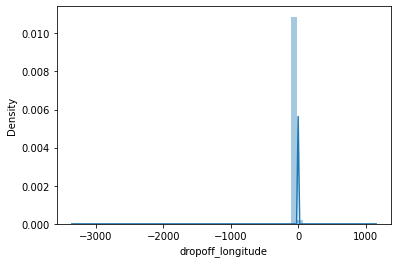

In [17]:
sns.distplot(train['dropoff_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


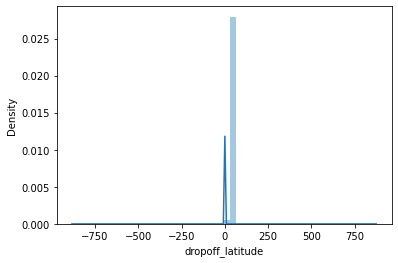

In [18]:
sns.distplot(train['dropoff_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


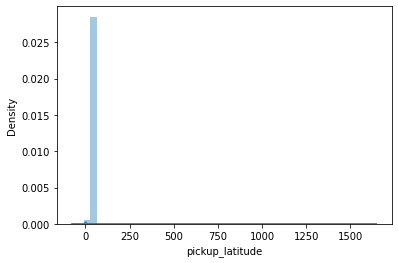

In [19]:
sns.distplot(train['pickup_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


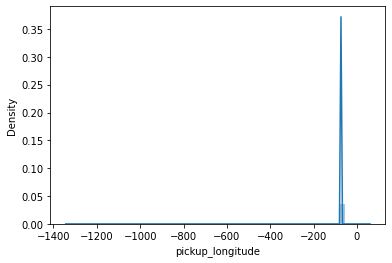

In [20]:
sns.distplot(train['pickup_longitude'])

In [21]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value -74.00110699999998
drop_off latitude max value 47.433332
drop_off longitude min value -1491.194073
drop_off longitude max value 40.796262
pickup latitude min value -74.001047
pickup latitude max value 42.46842
pickup longitude min value -80.734728
pickup longitude max value 40.812005


In [22]:
min_latitude = -74.001047,
min_longitude = -1491.194073,
max_latitude = 47.433332,
max_longitude = 40.812005

In [23]:
temp_data = train[(train["dropoff_latitude"] < min_latitude) | 
                (train["pickup_latitude"] < min_latitude) |
                (train["dropoff_longitude"] < min_longitude) | 
                (train["pickup_longitude"] < min_longitude) |
                (train["dropoff_latitude"] > max_latitude) | 
                (train["pickup_latitude"] > max_latitude) | 
                (train["dropoff_longitude"] > max_longitude) | 
                (train["pickup_longitude"] > max_longitude) ]

print("Before dropping: ",train.shape)
train.drop(temp_data.index,inplace=True)
print("After dropping: ",train.shape)

Before dropping:  (199999, 7)
After dropping:  (199968, 7)


In [24]:
import calendar
train['day'] = train['pickup_datetime'].apply(lambda x:x.day)
train['hour'] = train['pickup_datetime'].apply(lambda x:x.hour)
train['month'] = train['pickup_datetime'].apply(lambda x:x.month)
train['year'] = train['pickup_datetime'].apply(lambda x:x.year)
train['weekday'] = train['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [25]:
train.weekday = train.weekday.map({'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})

In [26]:
train.drop(labels = 'pickup_datetime', axis = 1, inplace = True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199968 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199968 non-null  float64
 1   pickup_longitude   199968 non-null  float64
 2   pickup_latitude    199968 non-null  float64
 3   dropoff_longitude  199968 non-null  float64
 4   dropoff_latitude   199968 non-null  float64
 5   passenger_count    199968 non-null  int64  
 6   day                199968 non-null  int64  
 7   hour               199968 non-null  int64  
 8   month              199968 non-null  int64  
 9   year               199968 non-null  int64  
 10  weekday            199968 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


**BUILDING THE MODEL**

In [28]:
from sklearn.model_selection import train_test_split
X = train.drop("fare_amount", axis=1)
X.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


In [29]:
y = train['fare_amount']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159974, 10), (39994, 10), (159974,), (39994,))

**LINEAR REGRESSION**

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

lr_model = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE value for Linear regression:', lr_model)

RMSE value for Linear regression: 9.666494080250487


**RANDOM FOREST**

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_model = np.sqrt(mean_squared_error(y_pred, y_test))
print('RMSE value for Random Forest:', rf_model)

RMSE value for Random Forest: 4.2954173501552395


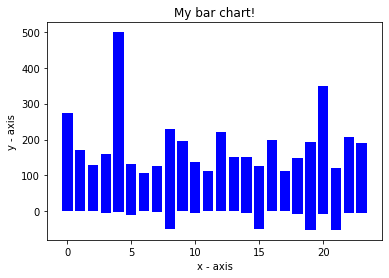

In [33]:
import matplotlib.pyplot as plt
 
# plotting a bar chart
plt.bar(train['hour'], train['fare_amount'],
        width = 0.8, color = ['blue'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
 
# function to show the plot
plt.show()

In [34]:
test.drop(test[['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key']], axis = 1, inplace = True)

In [35]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [36]:
#changing pickup_datetime type from object to datetime
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [37]:
test['day'] = test['pickup_datetime'].apply(lambda x:x.day)
test['hour'] = test['pickup_datetime'].apply(lambda x:x.hour)
test['month'] = test['pickup_datetime'].apply(lambda x:x.month)
test['year'] = test['pickup_datetime'].apply(lambda x:x.year)
test['weekday'] = test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [38]:
test.drop(['pickup_datetime'], axis = 1, inplace = True)

In [39]:
test.weekday = test.weekday.map({'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})

In [40]:
test.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.951662,40.790710,-73.947570,40.756220,1,10,19,2,2011,4
1,-73.951007,40.771508,-73.974075,40.763553,1,23,9,6,2011,4
2,-73.996473,40.747930,-73.990298,40.756152,6,14,10,7,2012,6
3,-73.997934,40.716890,-73.952617,40.727149,1,19,22,10,2014,0
4,-73.952583,40.714039,-73.906128,40.711281,1,25,22,5,2015,1


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   50000 non-null  float64
 1   pickup_latitude    50000 non-null  float64
 2   dropoff_longitude  50000 non-null  float64
 3   dropoff_latitude   50000 non-null  float64
 4   passenger_count    50000 non-null  int64  
 5   day                50000 non-null  int64  
 6   hour               50000 non-null  int64  
 7   month              50000 non-null  int64  
 8   year               50000 non-null  int64  
 9   weekday            50000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 3.8 MB


In [42]:
y_pred = rf.predict(test)

In [43]:
df = pd.DataFrame(y_pred)
df.head(5)

,0
0,11.983
1,9.929
2,6.133
3,10.844
4,13.107


In [45]:
df.to_csv('pred.csv')

In [46]:
from google.colab import files
files.download('pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>